In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
'''
创建训练(聚类)样本
样本数目：1500
随机数种子：170
'''
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, n_features=2, 
                  centers=3, random_state=random_state)

In [8]:
X, y

(array([[ -5.19811282e+00,   6.41869316e-01],
        [ -5.75229538e+00,   4.18627111e-01],
        [ -1.08448984e+01,  -7.55352273e+00],
        ..., 
        [  1.36105255e+00,  -9.07491863e-01],
        [ -3.54141108e-01,   7.12241630e-01],
        [  1.88577252e+00,   1.41185693e-03]]), array([1, 1, 0, ..., 2, 2, 2]))

此外，scikit-learn包含各种随机样本生成器，可用于构建受控大小和复杂度的人工数据集。
make_blobs生成用于聚类的各向同性高斯斑点,对每个群集的中心和标准偏差提供更好的控制，并用于演示群集。

args-----------

n_samples: 总样本

n_features:

centers:

cluster_std: 簇的标准差

center_box: 每个簇的边界

shuffle:

random_state:

returns------------

X:

y:

In [12]:
kms = KMeans(n_clusters=2, random_state=random_state)

In [13]:
kms.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=170, tol=0.0001, verbose=0)

In [24]:
y_pred = kms.predict(X)

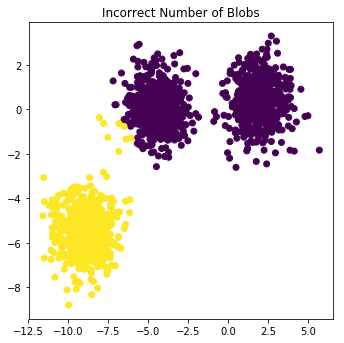

In [25]:
plt.figure(1, figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)  # 颜色参数c！！
plt.title("Incorrect Number of Blobs")  # 聚类中心点个数不合适
plt.show()

In [26]:
# 坐标变换后，分布不再是各向同性
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

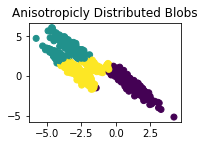

In [27]:
plt.figure(1)
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")
plt.show()

In [21]:
plt.figure?

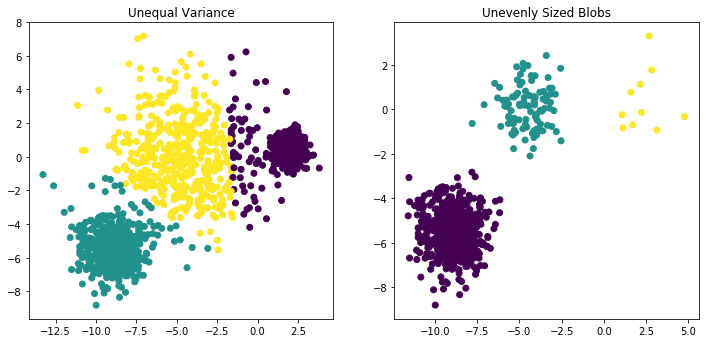

In [29]:
plt.figure(figsize=(12, 12))
# Different variance
# 每个簇的方差有较大差异
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# 簇的大小不一样，表现较好
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()